In [185]:
# identificar 4 drawdowns
# criar um grafico de calor com comparaçoes de janelas de investimento
# criadas a partir dos dds com intervalos de 6 meses, 12 meses 36m e 60m

In [186]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

In [187]:
acao = '^BVSP'
cotacoes = yf.download(acao, '2006-01-01')['Adj Close']

[*********************100%%**********************]  1 of 1 completed


In [188]:
cotacoes = cotacoes.to_frame()
cotacoes

,Adj Close
Date,
2006-01-02,33507.00000
2006-01-03,34541.00000
2006-01-04,35002.00000
2006-01-05,34936.00000
2006-01-06,35475.00000
...,...
2023-10-16,116534.00000
2023-10-17,115908.00000
2023-10-18,114060.00000


In [189]:
cotacoes['ano'] = cotacoes.index.year
cotacoes['cummax_ano'] = cotacoes.groupby('ano').cummax()

In [190]:
cotacoes['quedas'] = (cotacoes['Adj Close'] / cotacoes['cummax_ano'] - 1) 
cotacoes

,Adj Close,ano,cummax_ano,quedas
Date,,,,
2006-01-02,33507.00000,2006,33507.0,0.000000
2006-01-03,34541.00000,2006,34541.0,0.000000
2006-01-04,35002.00000,2006,35002.0,0.000000
2006-01-05,34936.00000,2006,35002.0,-0.001886
2006-01-06,35475.00000,2006,35475.0,0.000000
...,...,...,...,...
2023-10-16,116534.00000,2023,122560.0,-0.049168
2023-10-17,115908.00000,2023,122560.0,-0.054275
2023-10-18,114060.00000,2023,122560.0,-0.069354


In [191]:
maxdrawdown = cotacoes.groupby('ano')['quedas'].min().to_frame()
maxdrawdown.sort_values(['quedas']).head(6)

,quedas
ano,
2008,-0.599616
2020,-0.468158
2011,-0.320592
2013,-0.288539
2015,-0.255840
2014,-0.240533


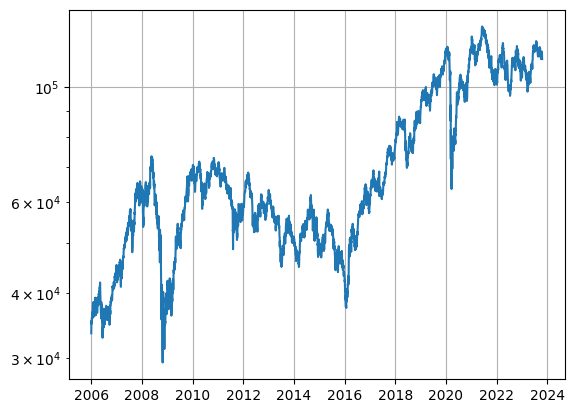

In [192]:
fig, ax = plt.subplots()
ax.plot(cotacoes['Adj Close'])
ax.grid(True)
ax.set_yscale('log')

In [193]:
cotacoes['cummax_total'] = cotacoes['Adj Close'].cummax()
cotacoes['quedas_total'] = ((cotacoes['Adj Close'] - cotacoes['cummax_total']) / cotacoes['cummax_total']) * 100

# cotacoes['quedas_total'] = cotacoes['quedas_total'] / cotacoes['cummax_total']
# cotacoes['quedas_total'] = cotacoes['quedas_total'] *100


cotacoes[['Adj Close', "cummax_ano",'quedas_total']]

,Adj Close,cummax_ano,quedas_total
Date,,,
2006-01-02,33507.00000,33507.0,0.000000
2006-01-03,34541.00000,34541.0,0.000000
2006-01-04,35002.00000,35002.0,0.000000
2006-01-05,34936.00000,35002.0,-0.188561
2006-01-06,35475.00000,35475.0,0.000000
...,...,...,...
2023-10-16,116534.00000,122560.0,-10.890377
2023-10-17,115908.00000,122560.0,-11.369059
2023-10-18,114060.00000,122560.0,-12.782162


[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236]
[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236, 32694.0, 65388.0, 98082.0, 130776.0]


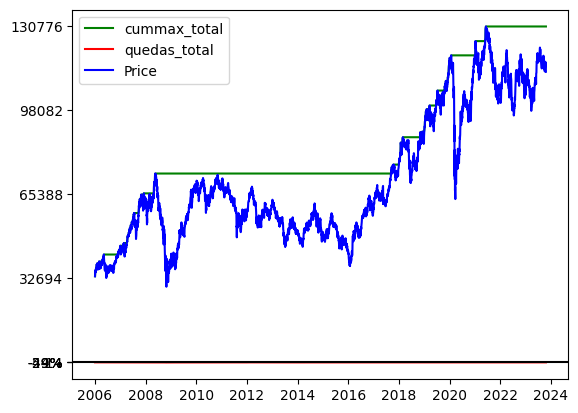

In [194]:
fig, ax = plt.subplots()
ax.plot(cotacoes['cummax_total'], label = "cummax_total", color='green')
ax.plot(cotacoes['quedas_total'], label = "quedas_total", color='red')
ax.plot(cotacoes['Adj Close'], label = "Price", color='blue')

y_max_cot = cotacoes['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236]
[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236, 18379.25, 36758.5, 55137.75, 73517.0]


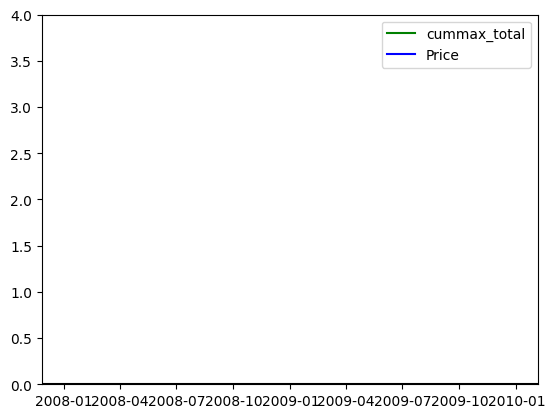

In [195]:
cotacoes_range = cotacoes[(cotacoes.index > '2008-01-01') & (cotacoes.index < '2010-01-01') ]
fig, ax = plt.subplots()
ax.plot(cotacoes_range['cummax_total'], label = "cummax_total", color='green')
# ax.plot(cotacoes_range['quedas_total'], label = "quedas_total")
ax.plot(cotacoes_range['Adj Close'], label = "Price", color= 'blue')

y_max_cot = cotacoes_range['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

ax.set_ylim(0, 4)

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
# ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236]
[-59.96164152508944, -44.97123114381708, -29.98082076254472, -14.99041038127236, 18379.25, 36758.5, 55137.75, 73517.0]


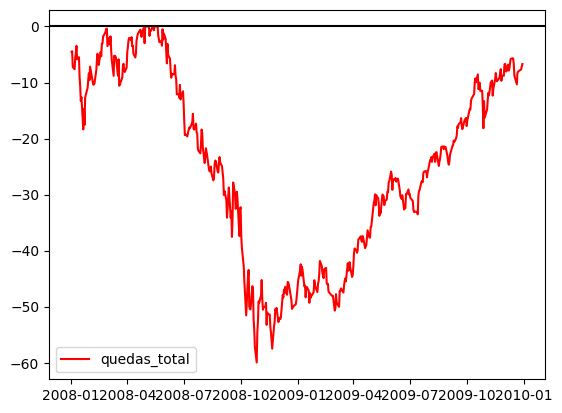

In [196]:
cotacoes_range = cotacoes[(cotacoes.index > '2008-01-01') & (cotacoes.index < '2010-01-01') ]
fig, ax = plt.subplots()
# ax.plot(cotacoes_range['cummax_total'], label = "cummax_total")
ax.plot(cotacoes_range['quedas_total'], label = "quedas_total", color='red')
# ax.plot(cotacoes_range['Adj Close'], label = "Price")

y_max_cot = cotacoes_range['Adj Close'].max()
y_min_quedas = cotacoes['quedas_total'].min()
y_pct_scale = [(y_min_quedas / 4) * (i+1) for i in range(4) ]
y_cot_scale = [(y_max_cot / 4) * (i+1) for i in range(4) ]
y_scale = sorted(y_pct_scale + y_cot_scale )

# ax.set_ylim(0, 4)

y_scale_label =  [str(int(y)) + '%' for y in y_scale[:3]] + [int(y) for y in y_scale[3:]]
print(sorted(y_pct_scale))
print(sorted(y_scale))



ax.legend()
ax.axhline(y = 0, color = 'black')
# ax.set_yscale('log')
# ax.yaxis.set_ticks(y_scale, y_scale_label)

# print(cotacoes)

In [200]:
cot = cotacoes['quedas_total'].dropna().drop_duplicates().to_frame()
cot['rank'] = cot['quedas_total'].rank()
cot.sort_values('rank').head(50)
print(cot[cot.index.year == 2008].sort_values('rank').head(10))
print(cot[cot.index.year == 2009].sort_values('rank').head(10))
print(cot[cot.index.year == 2016].sort_values('rank').head(10))
print(cot[cot.index.year == 2020].sort_values('rank').head(10))

            quedas_total  rank
Date                          
2008-10-27    -59.961642   1.0
2008-11-21    -57.491465   2.0
2008-10-24    -57.177252   3.0
2008-10-28    -54.586014   4.0
2008-11-19    -54.561530   5.0
2008-10-23    -53.999755   6.0
2008-11-18    -53.622972   7.0
2008-11-24    -53.495110   8.0
2008-11-12    -53.243467   9.0
2008-12-01    -52.744263  10.0
            quedas_total  rank
Date                          
2009-03-02    -50.712080  23.0
2009-03-03    -50.395147  27.0
2009-03-09    -50.023804  32.0
2009-03-06    -49.528680  38.0
2009-01-20    -49.301522  41.0
2009-03-05    -49.169580  42.0
2009-01-22    -48.455459  50.0
2009-01-14    -48.335759  53.0
2009-01-23    -48.131725  56.0
2009-02-26    -48.066434  57.0
            quedas_total  rank
Date                          
2016-01-26    -48.995470  44.0
2016-01-20    -48.794156  47.0
2016-01-21    -48.696220  48.0
2016-01-18    -48.396969  51.0
2016-01-22    -48.269108  54.0
2016-01-19    -48.233742  55.0
2016-01-

In [198]:
print(__vsc_ipynb_file__)

c:\Users\Gabriel\Python Dados\Projetos\drawdowns.ipynb
